## [作業重點]
確保你了解隨機森林模型中每個超參數的意義，並觀察調整超參數對結果的影響

## 作業

1. 試著調整 RandomForestClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型與決策樹的結果進行比較

In [4]:
from sklearn import datasets, metrics
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from fractions import Fraction
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

accuracy of iris RFC: 0.9777777777777777
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2] 
 [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]
accuracy of iris DTC: 0.9777777777777777
[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2] 
 [2 0 2 2 2 1 2 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2 1 0 2 0 1 2 2
 1 1 0 2 0 1 0 2]


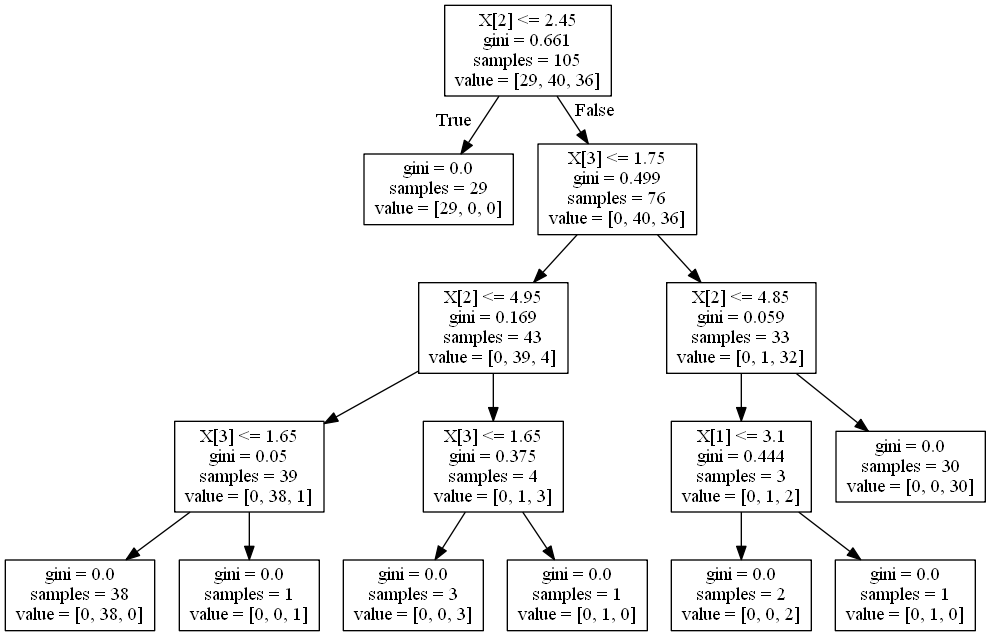

In [9]:
iris = datasets.load_iris()

RFC = RandomForestClassifier(n_estimators=200,max_depth=4)
DTC = DecisionTreeClassifier()
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.3,random_state=4)

DTC.fit(x_train,y_train)
RFC.fit(x_train,y_train)

y_pred=RFC.predict(x_test)
y_pred2=DTC.predict(x_test)
print("accuracy of iris RFC:", metrics.accuracy_score(y_test,y_pred))
print(y_test,"\n",y_pred)
print("accuracy of iris DTC:", metrics.accuracy_score(y_test,y_pred2))
print(y_test,"\n",y_pred2)
iris_DTC = StringIO()
export_graphviz(DTC,out_file=iris_DTC)
graph = pydotplus.graph_from_dot_data(iris_DTC.getvalue())
Image(graph.create_png())

MSE of boston RFR: 22.10007113438882
MSE of boston DTR: 26.94312495606095
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[4.99282701e-02 2.54011392e-04 2.53280967e-03 1.77405605e-03
 1.11082772e-02 5.28503447e-01 3.58025386e-03 5.01653449e-02
 1.21272400e-03 8.03973489e-03 9.16987361e-03 4.48280393e-03
 3.29248394e-01]
[5.04642574e-02 2.47573242e-04 1.52594759e-02 1.13959351e-02
 1.44878188e-02 5.56660348e-01 1.16140486e-02 6.94571831e-02
 3.62898017e-03 1.18931755e-02 1.92177064e-02 9.32670737e-03
 2.26346790e-01]


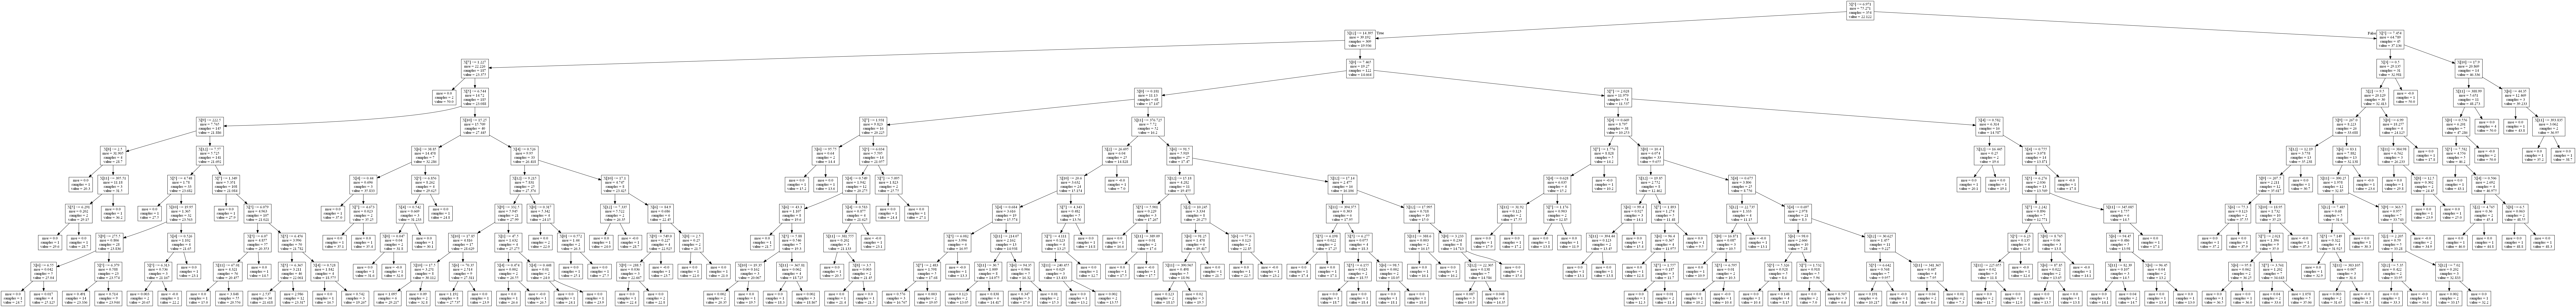

In [10]:
boston = datasets.load_boston()

RFR = RandomForestRegressor(n_estimators=200,max_depth=4)
DTR = DecisionTreeRegressor(max_depth=10)

x_train,x_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size = 0.3,random_state=4)

RFR.fit(x_train,y_train)
DTR.fit(x_train,y_train)

y_pred = RFR.predict(x_test)
y_pred2 = DTR.predict(x_test)

print("MSE of boston RFR:", metrics.mean_squared_error(y_test,y_pred))
#print(y_test,"\n",y_pred)
print("MSE of boston DTR:", metrics.mean_squared_error(y_test,y_pred2))
#print(y_test,"\n",y_pred2)
print(boston.feature_names)
print(RFR.feature_importances_)
print(DTR.feature_importances_)
boston_DTR = StringIO()
export_graphviz(DTR,out_file=boston_DTR)
graph = pydotplus.graph_from_dot_data(boston_DTR.getvalue())
Image(graph.create_png())

accuracy of wine RFC: 0.9814814814814815
[2 2 0 0 1 2 0 1 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 2 0
 0 0 2 2 0 0 1 1 0 1 2 0 2 1 1 1 0] 
 [2 2 0 0 1 2 0 1 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 2 0
 0 0 2 2 0 0 2 1 0 1 2 0 2 1 1 1 0]
accuracy of wine DTC: 0.9259259259259259
[2 2 0 0 1 2 0 1 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 2 0
 0 0 2 2 0 0 1 1 0 1 2 0 2 1 1 1 0] 
 [2 2 0 0 0 2 0 1 0 1 1 0 2 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 0 1 2 2 0
 0 0 2 2 0 1 2 1 0 1 2 1 2 1 1 1 0]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[0.129058   0.03101084 0.01041453 0.04013315 0.02787582 0.06572764
 0.15316081 0.00845999 0.02411318 0.14997802 0.07123609 0.11565134
 0.17318059]
[0.         0.         0.         0.         0.         0.
 0.3966316  0.         0.         0.39192945 0.       

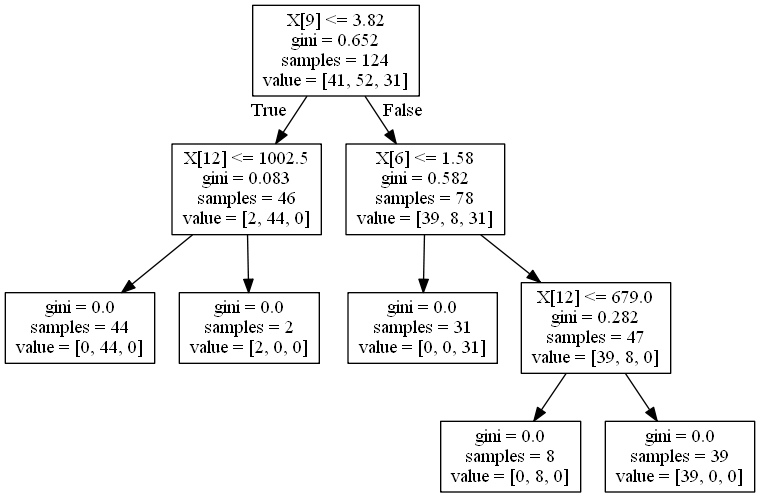

In [11]:
wine = datasets.load_wine()

x_train,x_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size = 0.3,random_state=4)

RFC.fit(x_train,y_train)
DTC.fit(x_train,y_train)

y_pred=RFC.predict(x_test)
y_pred2=DTC.predict(x_test)
print("accuracy of wine RFC:", metrics.accuracy_score(y_test,y_pred))
print(y_test,"\n",y_pred)
print("accuracy of wine DTC:", metrics.accuracy_score(y_test,y_pred2))
print(y_test,"\n",y_pred2)
#export_graphviz(DTC,out_file="wine_DTC.dot")
print(wine.feature_names)
print(RFC.feature_importances_)
print(DTC.feature_importances_)
wine_DTC = StringIO()
export_graphviz(DTC,out_file=wine_DTC)
graph = pydotplus.graph_from_dot_data(wine_DTC.getvalue())
Image(graph.create_png())